In [1]:
# General important stuff
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.semiconductor_laser import *

from scipy.integrate import odeint, RK45, solve_ivp

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## This is a laser model based the book _Diode laser and Integrated Photonic Circuits_, TABLE 5.1 for in-plane and VSCEL laser designs
#### Laser metrics caculation: cavity Q, threshold $I_{th}$, efficiency $\eta$, ST linewidth $\nu_{ST}$

In [2]:
laser = LaserModel('inplane')
# laser = LaserModel('vscel')

-----------------REPORT------------------
Cavity Q:      3.4e+03
Active loss:   5680.3 MHz
Passive loss:  0.0 MHz
Cavity loss:   5680.3 MHz
Mirror loss:   51778.8 MHz
g_th:          1580.5 cm^(-1)
N_th:          3.77e18 cm^(-3)
I_th:          1.1 mA
eta_d:         90.1 %
eta:           72.1 %
ST linewidth:  5.1e+07 Hz


#### PI sweep from 0 mA to $10\times I_{th}$, showing thresholding and linewidth narrowing behaviors

c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:99: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))
c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:398: RuntimeWarning: overflow encountered in double_scalars
  laser.A * Ne + laser.B * Ne ** 2 + laser.C * Ne ** 3) - laser.v_g_a * g * Np,


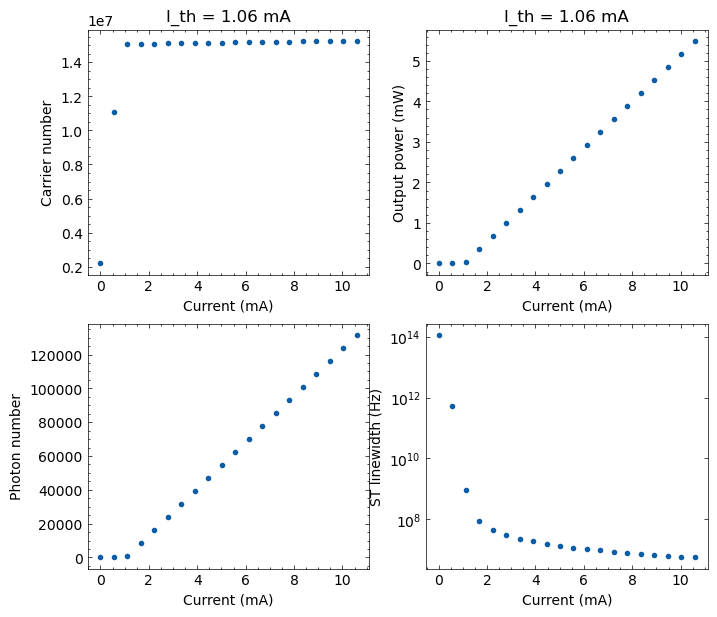

In [3]:
Ix = np.linspace(0,10*laser.I_th,20)
laser.PI_visulization(Ix,plotindensity=False)

#### Time-domain transient visualization of laser dynamics

c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:99: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))


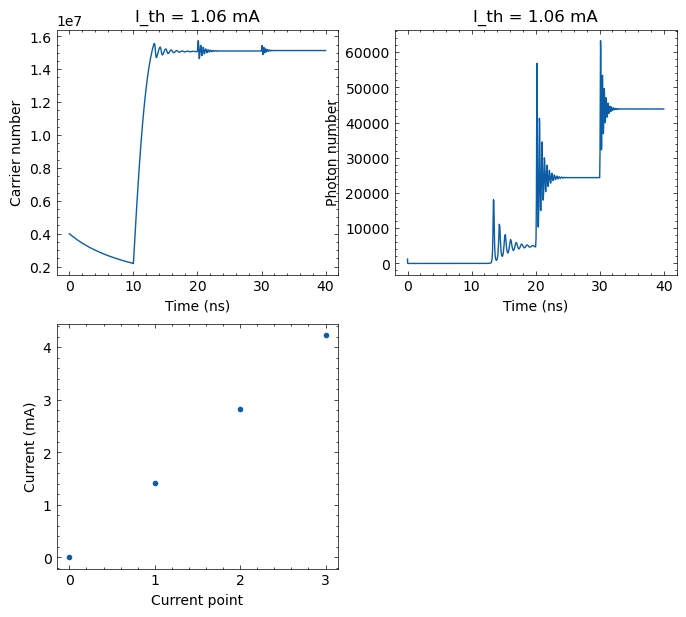

In [4]:
Ix = np.linspace(0,4*laser.I_th,4)
laser.transient_visulization(Ix,plotindensity=False)

#### Laser current modulation frequency response, in terms of carrier density, photon density and output power 

Text(0, 0.5, 'dP/dI (mW/mA)')

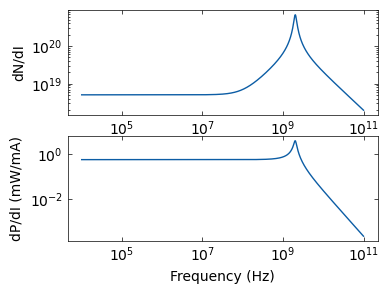

In [5]:
n1,s1,p1,H,freqx = laser.freqresp_current_mod(laser.I_th*2,freq1 = 1e4,freq2 = 1e11)
plt.subplot(211)
plt.loglog(freqx,abs(n1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dN/dI')
plt.subplot(212)
plt.loglog(freqx,abs(p1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dP/dI (mW/mA)')